In [1]:
import numpy as np
import pandas as pd
import pickle 

%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
import scripts.map_and_average as mapper
import scripts.classification as classification

## Feature learning and write output

In [ ]:
print "mapping..."
data_list, pcadata_list, ldadata_list, nmfdata_list, ssnmfdata_list, classlabs, audiolabs = mapper.map_and_average_frames(min_variance=0.99)
mapper.write_output(data_list, pcadata_list, ldadata_list, nmfdata_list, ssnmfdata_list, classlabs, audiolabs)

## Classification

In [ ]:
df_results = classification.classify_for_filenames(file_list=mapper.OUTPUT_FILES)

Sort results by accuracy of all features ('All' - Column 2)

In [6]:
df_results_sorted = df_results.sort_values(2, ascending=False, inplace=False)
df_results_sorted.head()
print df_results_sorted.to_latex(index=False)

\begin{tabular}{llrrrrr}
\toprule
     0 &    1 &         2 &         3 &         4 &         5 &         6 \\
\midrule
   LDA &  LDA &  0.320670 &  0.150313 &  0.070247 &  0.198583 &  0.107355 \\
 SSNMF &  LDA &  0.183202 &  0.053345 &  0.038873 &  0.165382 &  0.081976 \\
   NMF &  LDA &  0.178244 &  0.058666 &  0.046366 &  0.166222 &  0.085643 \\
    NA &  LDA &  0.176954 &  0.059945 &  0.037882 &  0.191218 &  0.083935 \\
   PCA &  LDA &  0.175099 &  0.055029 &  0.045930 &  0.161503 &  0.083973 \\
   LDA &  KNN &  0.151978 &  0.054739 &  0.023233 &  0.281734 &  0.085792 \\
 SSNMF &  KNN &  0.143227 &  0.043130 &  0.015224 &  0.227101 &  0.071541 \\
   PCA &  KNN &  0.140644 &  0.052517 &  0.026873 &  0.220850 &  0.081427 \\
    NA &  KNN &  0.140075 &  0.051532 &  0.027336 &  0.221769 &  0.081473 \\
   NMF &  KNN &  0.114299 &  0.043058 &  0.028528 &  0.177820 &  0.079545 \\
    NA &   RF &  0.084140 &  0.045801 &  0.022834 &  0.118752 &  0.052336 \\
   LDA &   RF &  0.075053 &  0.04

## Confusion matrix

According to results above, best classifier = LDA and best transformation = LDA.

In [7]:
CF, labels = classification.confusion_matrix_for_dataset(mapper.OUTPUT_FILES[0], 
                                                                   classifier='LDA')

accuracy 0.320669835863


Export the confusion matrix into .csv because it is too large (137 x 137) to visualise. 

In [ ]:
np.savetxt('../data/confusion_matrix_labels.csv', labels, fmt='%s')
np.savetxt('../data/confusion_matrix.csv', CF, fmt='%10.5f')

Use the figure functionality to zoom in the confusion matrix.

<IPython.core.display.Javascript object>


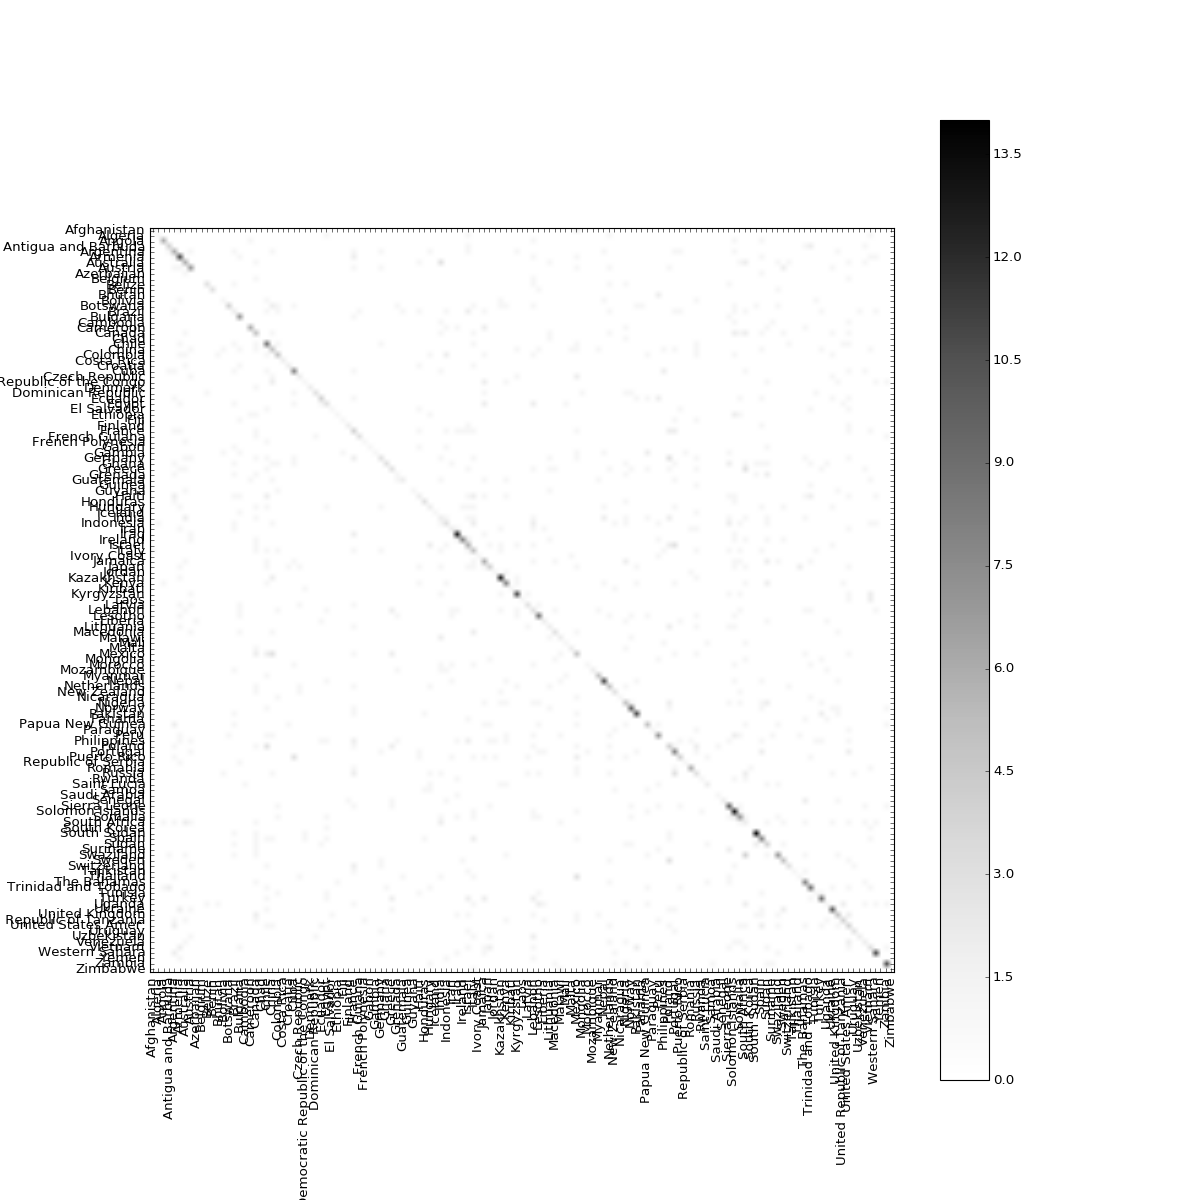

In [6]:
%matplotlib notebook
plt.figure(figsize=(15, 15))
classification.plot_CF(CF, labels=labels)